<a href="https://colab.research.google.com/github/MocktaiLEngineer/PyNN-Less/blob/main/BigramLanguageModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
# Get the names.txt file
!wget https://raw.githubusercontent.com/karpathy/makemore/master/names.txt

--2023-02-16 14:34:41--  https://raw.githubusercontent.com/karpathy/makemore/master/names.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 228145 (223K) [text/plain]
Saving to: ‘names.txt’

names.txt           100%[===================>] 222.80K  --.-KB/s    in 0.03s   

2023-02-16 14:34:41 (8.50 MB/s) - ‘names.txt’ saved [228145/228145]



In [ ]:
words = open('names.txt','r').read().splitlines()

In [ ]:
# Let's build a bigram table instead
TOKEN = '.'
vocab = [TOKEN] + sorted(list(set(''.join(words))))

In [ ]:
# To build the bigram table, we need to index into the table and need integers (hence map chars to integers)
n = len(vocab)
N = torch.zeros((n,n), dtype = torch.int32)

In [ ]:
char_to_int = {char:i for i,char in enumerate(vocab)}
int_to_char = {value:key for key,value in char_to_int.items()}

In [ ]:
for word in words:
  chars = [TOKEN] + list(word) + [TOKEN]
  for ch1,ch2 in zip(chars,chars[1:]):
    ix1 = char_to_int[ch1]
    ix2 = char_to_int[ch2]
    N[ix1,ix2] += 1 

In [ ]:
P = N.float()
P /= P.sum(1, keepdim = True)

In [ ]:
# Let's sample and generate
generator = torch.Generator().manual_seed(2147483647)

for i in range(10):
  name = []
  ix = 0
  while True:
    probs = P[ix]
    ix = torch.multinomial(probs, num_samples = 1, replacement = True, generator = generator).item()
    name.append(int_to_char[ix])
    if ix == 0:
      break
  print(''.join(name))

mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.
odaren.
iaddash.
h.
jhinatien.
egushl.


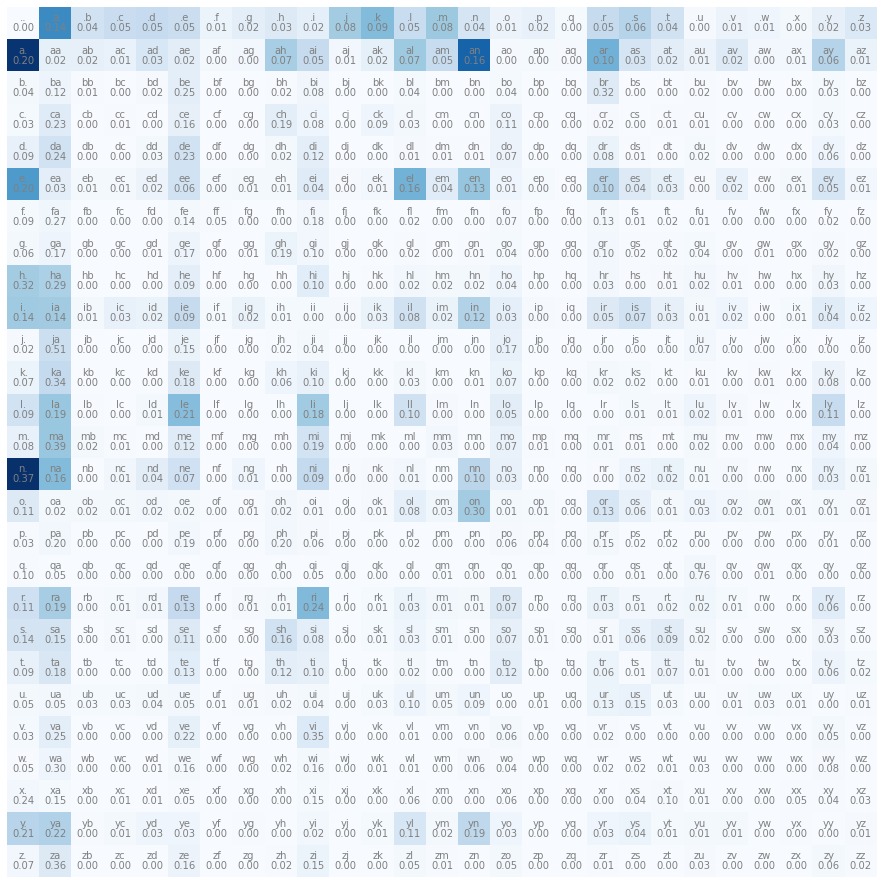

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(n):
    for j in range(n):
        chstr = int_to_char[i] + int_to_char[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, '{0:.2f}'.format(P[i, j].item()), ha="center", va="top", color='gray')
plt.axis('off');